<a href="https://colab.research.google.com/github/whatsgoodg/ML-DL-basics/blob/main/train_set%2C_test_set_and_sampling_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>도미와 빙어 데이터 
* [0:35]: 도미
* [35:50]: 빙어
샘플링 편향을 보이기 위해 이러한 데이터를 사용

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

> 학습을 위해 이차원 배열로 변경
* fish_data: [길이, 무게]를 가지는 리스트
* fish_target: 도미 1, 빙어 0

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

>scikit-learn의 KNeighborsClassfier의 객체를 생성

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

>훈련 데이터와 테스트 데이터 추출
* train: 35/49
* test: 14/49

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

>훈련 데이터를 통해 모델 학습 후 정확도 추출



In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

>샘플링 편향, 리스트 앞의 35개는 도미 14개는 빙어였기 때문에 도미만 학습         
             
>샘플링 편향을 없애도록 넘파이로 배열을 무직위로 추출.    
인덱싱을 무작위로 한다.(0부터 48의 index를 리스트 형태로 섞는다)

In [ ]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
np.random.seed(42)
index = np.arange(49) # 0~48 인덱스
np.random.shuffle(index) # 리스트 원소 셔플
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

>훈련 데이터와 테스트 데이터 추출
* train: 35/49
* test: 14/49

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

>맷플롯립으로 test와 train data 산점도 확인
* 파란색: train set
* 주황색: test set

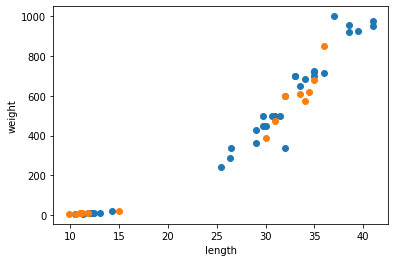

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(test_input[:, 0], test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

>이제 머신러닝을 학습시키고 정확도를 확인

In [ ]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict(test_input))
test_target

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])